# Sleep analysis

It has been 6 months since I have been tracking my sleeping data. I bought a Samsung Galaxy Watch Active 2 which allows me to track every stages of my sleep, every night.

The goal of this project is to analyse my sleep and see if I can find any correlations between my sleep quality and other external factors.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns

In [2]:
sleep_data = pd.read_csv('sleep_data_2021_02_09.csv', sep=';', skiprows=[0])

In [3]:
sleep_data.head()

,start_time,sleep_id,custom,update_time,create_time,stage,time_offset,deviceuuid,pkg_name,end_time,datauuid
0,2020-09-01 23:22:00.000,b953ce09-66f0-5b6f-5b56-83c7dcd10e3b,NaN,02.09.20 07:28,02.09.20 07:28,40001,UTC+0200,0CI+8SNNP+,com.sec.android.app.shealth,2020-09-01 23:26:00.000,3713d761-0e35-bae5-ae2e-bdb42c2e1536
1,2020-09-01 23:49:00.000,b953ce09-66f0-5b6f-5b56-83c7dcd10e3b,NaN,02.09.20 07:28,02.09.20 07:28,40002,UTC+0200,0CI+8SNNP+,com.sec.android.app.shealth,2020-09-02 00:06:00.000,72ec0096-b482-f885-2580-a6f95f91af15
2,2020-09-02 00:42:00.000,b953ce09-66f0-5b6f-5b56-83c7dcd10e3b,NaN,02.09.20 07:28,02.09.20 07:28,40004,UTC+0200,0CI+8SNNP+,com.sec.android.app.shealth,2020-09-02 00:49:00.000,a25927cb-e04c-04d4-6231-032a60a218dc
3,2020-09-02 01:09:00.000,b953ce09-66f0-5b6f-5b56-83c7dcd10e3b,NaN,02.09.20 07:28,02.09.20 07:28,40004,UTC+0200,0CI+8SNNP+,com.sec.android.app.shealth,2020-09-02 01:23:00.000,3a97ac3d-a55b-d34e-db1c-4b594e055823
4,2020-09-02 02:25:00.000,b953ce09-66f0-5b6f-5b56-83c7dcd10e3b,NaN,02.09.20 07:28,02.09.20 07:28,40002,UTC+0200,0CI+8SNNP+,com.sec.android.app.shealth,2020-09-02 02:58:00.000,f12df4f9-97aa-6a4b-dd17-27f2d70b8c06


In [4]:
sleep_data.drop(['custom','sleep_id','deviceuuid','pkg_name','datauuid'],axis=1, inplace=True)

In [5]:
sleep_data.head()

,start_time,update_time,create_time,stage,time_offset,end_time
0,2020-09-01 23:22:00.000,02.09.20 07:28,02.09.20 07:28,40001,UTC+0200,2020-09-01 23:26:00.000
1,2020-09-01 23:49:00.000,02.09.20 07:28,02.09.20 07:28,40002,UTC+0200,2020-09-02 00:06:00.000
2,2020-09-02 00:42:00.000,02.09.20 07:28,02.09.20 07:28,40004,UTC+0200,2020-09-02 00:49:00.000
3,2020-09-02 01:09:00.000,02.09.20 07:28,02.09.20 07:28,40004,UTC+0200,2020-09-02 01:23:00.000
4,2020-09-02 02:25:00.000,02.09.20 07:28,02.09.20 07:28,40002,UTC+0200,2020-09-02 02:58:00.000


In [6]:
#I decide to remove update_time and create_time because they do not look actionable compared to start_time
#and end_time
sleep_data.drop(['update_time','create_time'],axis=1, inplace=True)

In [7]:
sleep_data.head()

,start_time,stage,time_offset,end_time
0,2020-09-01 23:22:00.000,40001,UTC+0200,2020-09-01 23:26:00.000
1,2020-09-01 23:49:00.000,40002,UTC+0200,2020-09-02 00:06:00.000
2,2020-09-02 00:42:00.000,40004,UTC+0200,2020-09-02 00:49:00.000
3,2020-09-02 01:09:00.000,40004,UTC+0200,2020-09-02 01:23:00.000
4,2020-09-02 02:25:00.000,40002,UTC+0200,2020-09-02 02:58:00.000


| Stage        | Signification           | Description |
| ------------- | :-------------| :------------- |
| 40001      | **Awaken stage of sleep.** | Eyes open. Responsive to external stimuli. |
| 40002      | **Light stage of sleep.** | Breathing slows down and heartbeat becomes regular. Typically lasts between 1 and 20 minutes after falling asleep. |
| 40003 | **Deep stage of sleep.** | Brain waves slow down and become larger. Typically starts 35 - 45 minutes after falling asleep. |
| 40004 | **REM (Rapid Eye Movement) stage of sleep.** | Brain waves similar to waking. Most vivid dreams happen in this stage. Body does not move. |

*https://developer.samsung.com/health/server/partner-only/api-reference/data-types/sleep-stage.html*

In [8]:
#All the data was mixed up. In here I sort the values by start time.
sleep_data = sleep_data.sort_values('start_time').reset_index().drop('index',axis=1)

In [9]:
sleep_data.head()

,start_time,stage,time_offset,end_time
0,2020-09-01 23:22:00.000,40001,UTC+0200,2020-09-01 23:26:00.000
1,2020-09-01 23:26:00.000,40003,UTC+0200,2020-09-01 23:29:00.000
2,2020-09-01 23:29:00.000,40002,UTC+0200,2020-09-01 23:30:00.000
3,2020-09-01 23:30:00.000,40003,UTC+0200,2020-09-01 23:33:00.000
4,2020-09-01 23:33:00.000,40002,UTC+0200,2020-09-01 23:43:00.000


In [10]:
sleep_data['start_time_date'] = sleep_data['start_time'].apply(lambda x: x.split(' ')[0])
sleep_data['start_time_hour'] = sleep_data['start_time'].apply(lambda x: x.split(' ')[1].split('.')[0])
sleep_data['end_time_date'] = sleep_data['end_time'].apply(lambda x: x.split(' ')[0])
sleep_data['end_time_hour'] = sleep_data['end_time'].apply(lambda x: x.split(' ')[1].split('.')[0])

In [11]:
sleep_data.head()

,start_time,stage,time_offset,end_time,start_time_date,start_time_hour,end_time_date,end_time_hour
0,2020-09-01 23:22:00.000,40001,UTC+0200,2020-09-01 23:26:00.000,2020-09-01,23:22:00,2020-09-01,23:26:00
1,2020-09-01 23:26:00.000,40003,UTC+0200,2020-09-01 23:29:00.000,2020-09-01,23:26:00,2020-09-01,23:29:00
2,2020-09-01 23:29:00.000,40002,UTC+0200,2020-09-01 23:30:00.000,2020-09-01,23:29:00,2020-09-01,23:30:00
3,2020-09-01 23:30:00.000,40003,UTC+0200,2020-09-01 23:33:00.000,2020-09-01,23:30:00,2020-09-01,23:33:00
4,2020-09-01 23:33:00.000,40002,UTC+0200,2020-09-01 23:43:00.000,2020-09-01,23:33:00,2020-09-01,23:43:00


In [12]:
def stage_pairing(x):
    if x == 40001:
        x = 'Awaken'
    elif x == 40002:
        x = 'Light'
    elif x == 40003:
        x = 'Deep'
    else:
        x = 'REM'
    return x

sleep_data['stage_of_sleep'] = sleep_data['stage'].apply(lambda x: stage_pairing(x))

In [13]:
sleep_data.head()

,start_time,stage,time_offset,end_time,start_time_date,start_time_hour,end_time_date,end_time_hour,stage_of_sleep
0,2020-09-01 23:22:00.000,40001,UTC+0200,2020-09-01 23:26:00.000,2020-09-01,23:22:00,2020-09-01,23:26:00,Awaken
1,2020-09-01 23:26:00.000,40003,UTC+0200,2020-09-01 23:29:00.000,2020-09-01,23:26:00,2020-09-01,23:29:00,Deep
2,2020-09-01 23:29:00.000,40002,UTC+0200,2020-09-01 23:30:00.000,2020-09-01,23:29:00,2020-09-01,23:30:00,Light
3,2020-09-01 23:30:00.000,40003,UTC+0200,2020-09-01 23:33:00.000,2020-09-01,23:30:00,2020-09-01,23:33:00,Deep
4,2020-09-01 23:33:00.000,40002,UTC+0200,2020-09-01 23:43:00.000,2020-09-01,23:33:00,2020-09-01,23:43:00,Light


In [14]:
sleep_data.drop(['start_time','stage','time_offset','end_time'], axis=1, inplace=True)

In [15]:
sleep_data.head()

,start_time_date,start_time_hour,end_time_date,end_time_hour,stage_of_sleep
0,2020-09-01,23:22:00,2020-09-01,23:26:00,Awaken
1,2020-09-01,23:26:00,2020-09-01,23:29:00,Deep
2,2020-09-01,23:29:00,2020-09-01,23:30:00,Light
3,2020-09-01,23:30:00,2020-09-01,23:33:00,Deep
4,2020-09-01,23:33:00,2020-09-01,23:43:00,Light


In [16]:
#Dates and hours are strings. I need to find a way to translate them into time values. I want to create a new
#column "Duration" to calculate the duration of each sleeping phase.

In [17]:
sleep_data['Duration'] = 0

for i in range(0,len(sleep_data)):
    sleep_data['Duration'].loc[i] = str((datetime.datetime.strptime(sleep_data['end_time_hour'].loc[i], '%H:%M:%S') - datetime.datetime.strptime(sleep_data['start_time_hour'].loc[i], '%H:%M:%S')))
    if sleep_data['Duration'].loc[i].find('day')!=-1:
        sleep_data['Duration'].loc[i] = sleep_data['Duration'].loc[i].split(', ')[1]
sleep_data['Duration'] = pd.to_timedelta(sleep_data['Duration'],errors='ignore')

/Users/salim/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
sleep_data.head()

,start_time_date,start_time_hour,end_time_date,end_time_hour,stage_of_sleep,Duration
0,2020-09-01,23:22:00,2020-09-01,23:26:00,Awaken,00:04:00
1,2020-09-01,23:26:00,2020-09-01,23:29:00,Deep,00:03:00
2,2020-09-01,23:29:00,2020-09-01,23:30:00,Light,00:01:00
3,2020-09-01,23:30:00,2020-09-01,23:33:00,Deep,00:03:00
4,2020-09-01,23:33:00,2020-09-01,23:43:00,Light,00:10:00


In [19]:
sleep_data['start_time_date_reworked']=0
for i in range(0, len(sleep_data)):
    if sleep_data['start_time_hour'].loc[i]>'21:00:00':
        sleep_data['start_time_date_reworked'].loc[i] = datetime.datetime.strptime(sleep_data['start_time_date'].loc[i], '%Y-%m-%d')
    elif sleep_data['start_time_hour'].loc[i] < '13:00:00':
        sleep_data['start_time_date_reworked'].loc[i] = datetime.datetime.strptime(sleep_data['start_time_date'].loc[i], '%Y-%m-%d') - datetime.timedelta(days=1)
    elif sleep_data['start_time_hour'].loc[i] >= '13:00:00' and sleep_data['start_time_hour'].loc[i] <= '21:00:00':
        sleep_data.drop(i,inplace=True)
    else:
        sleep_data['start_time_date_reworked'].loc[i] = datetime.datetime.strptime(sleep_data['start_time_date'].loc[i], '%Y-%m-%d')

In [20]:
#pd.set_option('display.max_rows', len(sleep_data))

sleep_data

,start_time_date,start_time_hour,end_time_date,end_time_hour,stage_of_sleep,Duration,start_time_date_reworked
0,2020-09-01,23:22:00,2020-09-01,23:26:00,Awaken,00:04:00,2020-09-01 00:00:00
1,2020-09-01,23:26:00,2020-09-01,23:29:00,Deep,00:03:00,2020-09-01 00:00:00
2,2020-09-01,23:29:00,2020-09-01,23:30:00,Light,00:01:00,2020-09-01 00:00:00
3,2020-09-01,23:30:00,2020-09-01,23:33:00,Deep,00:03:00,2020-09-01 00:00:00
4,2020-09-01,23:33:00,2020-09-01,23:43:00,Light,00:10:00,2020-09-01 00:00:00
...,...,...,...,...,...,...,...
12456,2021-02-09,07:48:00,2021-02-09,07:49:00,Awaken,00:01:00,2021-02-08 00:00:00
12457,2021-02-09,07:49:00,2021-02-09,07:52:00,Light,00:03:00,2021-02-08 00:00:00
12458,2021-02-09,07:52:00,2021-02-09,07:54:00,Awaken,00:02:00,2021-02-08 00:00:00
12459,2021-02-09,07:54:00,2021-02-09,07:58:00,Light,00:04:00,2021-02-08 00:00:00


In [21]:
sleep_data.head()

,start_time_date,start_time_hour,end_time_date,end_time_hour,stage_of_sleep,Duration,start_time_date_reworked
0,2020-09-01,23:22:00,2020-09-01,23:26:00,Awaken,00:04:00,2020-09-01 00:00:00
1,2020-09-01,23:26:00,2020-09-01,23:29:00,Deep,00:03:00,2020-09-01 00:00:00
2,2020-09-01,23:29:00,2020-09-01,23:30:00,Light,00:01:00,2020-09-01 00:00:00
3,2020-09-01,23:30:00,2020-09-01,23:33:00,Deep,00:03:00,2020-09-01 00:00:00
4,2020-09-01,23:33:00,2020-09-01,23:43:00,Light,00:10:00,2020-09-01 00:00:00


In [22]:
sleep_data_gb = sleep_data[['start_time_date_reworked','stage_of_sleep','Duration']]

In [23]:
sleep_data_gb.head()

,start_time_date_reworked,stage_of_sleep,Duration
0,2020-09-01 00:00:00,Awaken,00:04:00
1,2020-09-01 00:00:00,Deep,00:03:00
2,2020-09-01 00:00:00,Light,00:01:00
3,2020-09-01 00:00:00,Deep,00:03:00
4,2020-09-01 00:00:00,Light,00:10:00


In [24]:
sleep_data_final = sleep_data_gb.groupby(['start_time_date_reworked','stage_of_sleep']).sum().unstack().reset_index()
sleep_data_final.columns = sleep_data_final.columns.get_level_values(1)
sleep_data_final = pd.DataFrame(sleep_data_final)
sleep_data_final.columns = ['Date','Awaken','Deep','Light','REM']
#sleep_data_final.replace('NaT',0,inplace=True)
sleep_data_final.fillna(0,inplace=True)

/Users/salim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  


In [25]:
sleep_data_final['Total'] = sleep_data_final['Awaken']+sleep_data_final['Deep']+sleep_data_final['Light']+sleep_data_final['REM']

In [26]:
sleep_data_final.head()

,Date,Awaken,Deep,Light,REM,Total
0,2020-09-01,00:45:00,00:42:00,04:52:00,01:46:00,08:05:00
1,2020-09-02,00:55:00,00:47:00,05:28:00,00:57:00,08:07:00
2,2020-09-03,00:32:00,00:49:00,02:52:00,01:34:00,05:47:00
3,2020-09-04,00:27:00,01:04:00,04:40:00,02:40:00,08:51:00
4,2020-09-05,00:38:00,00:46:00,06:05:00,01:07:00,08:36:00


In [27]:
sleep_data_final['Weekend'] = 0
for i in range(0, len(sleep_data_final)):
    if datetime.date.weekday(sleep_data_final['Date'].loc[i]) < 5:
        sleep_data_final['Weekend'].loc[i] = 0
    else:
        sleep_data_final['Weekend'].loc[i] = 1

**Weekend = 0 =>** *Monday, Tuesday, Wednesday, Thursday, Friday*

**Weekend = 1 =>** *Saturday, Sunday*

In [28]:
sleep_data_final.head()

,Date,Awaken,Deep,Light,REM,Total,Weekend
0,2020-09-01,00:45:00,00:42:00,04:52:00,01:46:00,08:05:00,0
1,2020-09-02,00:55:00,00:47:00,05:28:00,00:57:00,08:07:00,0
2,2020-09-03,00:32:00,00:49:00,02:52:00,01:34:00,05:47:00,0
3,2020-09-04,00:27:00,01:04:00,04:40:00,02:40:00,08:51:00,0
4,2020-09-05,00:38:00,00:46:00,06:05:00,01:07:00,08:36:00,1


In [29]:
sleep_data_final.tail()

,Date,Awaken,Deep,Light,REM,Total,Weekend
155,2021-02-04,01:33:00,00:41:00,06:00:00,00:44:00,08:58:00,0
156,2021-02-05,01:03:00,00:39:00,05:24:00,01:14:00,08:20:00,0
157,2021-02-06,00:53:00,00:40:00,04:06:00,01:41:00,07:20:00,1
158,2021-02-07,01:24:00,00:45:00,02:35:00,01:00:00,05:44:00,1
159,2021-02-08,00:38:00,01:02:00,05:02:00,02:04:00,08:46:00,0


In [30]:
sleep_data_final['Total'].min()

Timedelta('0 days 04:30:00')

In [31]:
sleep_data_final['Total'].max()

Timedelta('0 days 11:02:00')

In [32]:
sleep_data_final[sleep_data_final['Weekend']==0]['Total'].mean()

Timedelta('0 days 07:45:09.913043')

In [33]:
sleep_data_final[sleep_data_final['Weekend']==1]['Total'].mean()

Timedelta('0 days 07:33:24')

In [34]:
sleep_data_final['Awaken'].mean()

Timedelta('0 days 00:49:31.125000')

In [35]:
sleep_data_final['Deep'].mean()

Timedelta('0 days 00:41:52.125000')

In [36]:
sleep_data_final['Light'].mean()

Timedelta('0 days 04:58:55.125000')

In [37]:
sleep_data_final['REM'].mean()

Timedelta('0 days 01:11:33')

In [38]:
(sleep_data_final['Deep']+sleep_data_final['Light']+sleep_data_final['REM']).mean()

Timedelta('0 days 06:52:20.250000')

In [63]:
print('Standard deviation (bed time):',(sleep_data_final['Total'].astype('timedelta64[m]')).std())

Standard deviation (bed time): 73.87085849153729


Text(0, 0.5, 'Bed time in minutes')

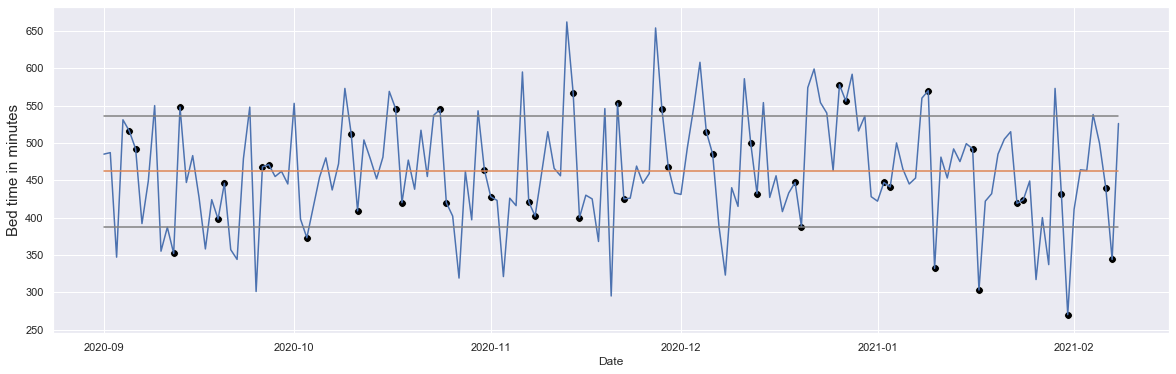

In [67]:
sns.set(rc={'figure.figsize':(20, 6)})
y = sleep_data_final['Total'].astype('timedelta64[m]')
sns.lineplot(x=sleep_data_final['Date'],y=y)
sns.scatterplot(x=sleep_data_final[sleep_data_final['Weekend']==1]['Date'],y=y,marker='o',s=60,color='black') #Weekend
sns.lineplot(x=sleep_data_final['Date'],y=y.mean()) #Average line
sns.lineplot(x=sleep_data_final['Date'],y=y.mean()+y.std(),color='grey') #Standard deviation line
sns.lineplot(x=sleep_data_final['Date'],y=y.mean()-y.std(),color='grey') #Standard deviation line
plt.ylabel('Bed time in minutes', fontsize=15)

In [62]:
print('Standard deviation (asleep):',(sleep_data_final['Deep'].astype('timedelta64[m]')+sleep_data_final['Light'].astype('timedelta64[m]')+sleep_data_final['REM'].astype('timedelta64[m]')).std())

Standard deviation (asleep): 69.48796443455416


/Users/salim/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Minutes asleep')

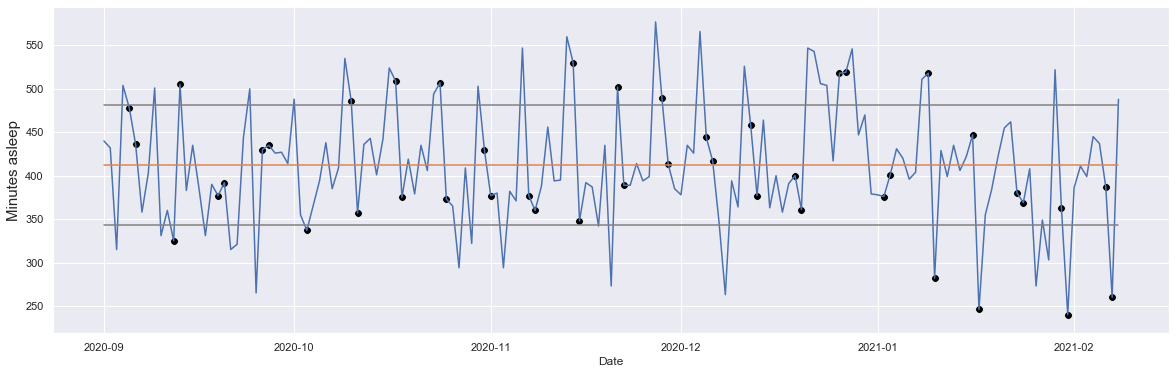

In [40]:
sns.set(rc={'figure.figsize':(20, 6)})
y = sleep_data_final['Deep'].astype('timedelta64[m]')+sleep_data_final['Light'].astype('timedelta64[m]')+sleep_data_final['REM'].astype('timedelta64[m]')
sns.lineplot(x=sleep_data_final['Date'],y=y)
sns.scatterplot(x=sleep_data_final[sleep_data_final['Weekend']==1]['Date'],y=y,marker='o',s=60,color='black') #Weekend
sns.lineplot(x=sleep_data_final['Date'],y=y.mean()) #Average line
sns.lineplot(x=sleep_data_final['Date'],y=y.mean()+y.std(),color='grey') #Standard deviation line
sns.lineplot(x=sleep_data_final['Date'],y=y.mean()-y.std(),color='grey') #Standard deviation line
plt.ylabel('Minutes asleep', fontsize=15)

In here I only took into account minutes asleep: Deep+Light+REM without taking into account awake time. The orange line is the average number of minutes asleep, the grey ones are the standard deviation and the black dots are the weekend days.

Text(0, 0.5, 'Minutes asleep')

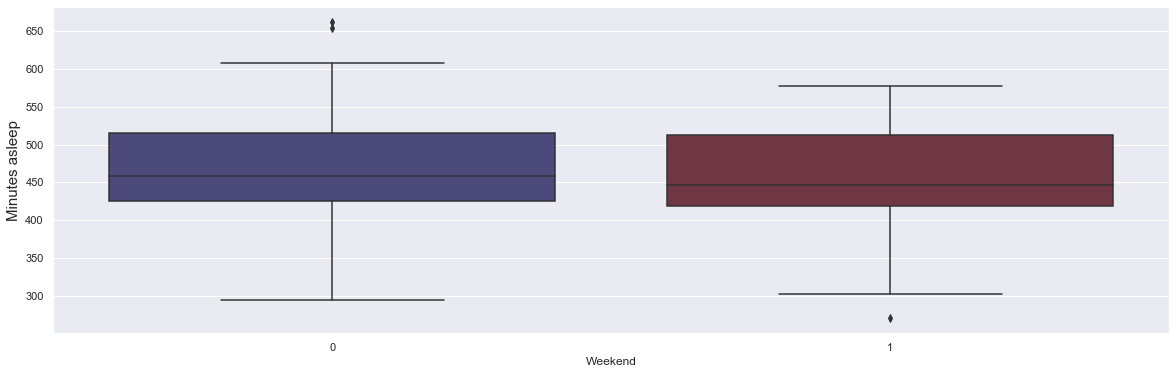

In [41]:
sns.boxplot(x=sleep_data_final['Weekend'],y=sleep_data_final['Total'].astype('timedelta64[m]'),palette='icefire')
plt.ylabel('Minutes asleep', fontsize=15)

# Analysis per hour

In [42]:
sleep_data_per_hour = sleep_data

In [43]:
def hour_matching(x):
    if x >= '00:00:00' and x < '01:00:00':
        x = '00:00:00'
    elif x >= '01:00:00' and x < '02:00:00':
        x = '01:00:00'
    elif x >= '02:00:00' and x < '03:00:00':
        x = '02:00:00'
    elif x >= '03:00:00' and x < '04:00:00':
        x = '03:00:00'
    elif x >= '04:00:00' and x < '05:00:00':
        x = '04:00:00'
    elif x >= '05:00:00' and x < '06:00:00':
        x = '05:00:00'
    elif x >= '06:00:00' and x < '07:00:00':
        x = '06:00:00'
    elif x >= '07:00:00' and x < '08:00:00':
        x = '07:00:00'
    elif x >= '08:00:00' and x < '09:00:00':
        x = '08:00:00'
    elif x >= '09:00:00' and x < '10:00:00':
        x = '09:00:00'
    elif x >= '10:00:00' and x < '11:00:00':
        x = '10:00:00'
    elif x >= '11:00:00' and x < '12:00:00':
        x = '11:00:00'
    elif x >= '12:00:00' and x < '13:00:00':
        x = '12:00:00'
    elif x >= '13:00:00' and x < '14:00:00':
        x = '13:00:00'
    elif x >= '14:00:00' and x < '15:00:00':
        x = '14:00:00'
    elif x >= '15:00:00' and x < '16:00:00':
        x = '15:00:00'
    elif x >= '16:00:00' and x < '17:00:00':
        x = '16:00:00'
    elif x >= '17:00:00' and x < '18:00:00':
        x = '17:00:00'
    elif x >= '18:00:00' and x < '19:00:00':
        x = '18:00:00'
    elif x >= '19:00:00' and x < '20:00:00':
        x = '19:00:00'
    elif x >= '20:00:00' and x < '21:00:00':
        x = '20:00:00'
    elif x >= '21:00:00' and x < '22:00:00':
        x = '21:00:00'
    elif x >= '22:00:00' and x < '23:00:00':
        x = '22:00:00'
    elif x >= '23:00:00' and x <= '23:59:00':
        x = '23:00:00'
    return x

In [44]:
sleep_data_per_hour['start_time_hour']=sleep_data_per_hour['start_time_hour'].apply(lambda x: hour_matching(x))

In [45]:
sleep_data_per_hour.head()

,start_time_date,start_time_hour,end_time_date,end_time_hour,stage_of_sleep,Duration,start_time_date_reworked
0,2020-09-01,23:00:00,2020-09-01,23:26:00,Awaken,00:04:00,2020-09-01 00:00:00
1,2020-09-01,23:00:00,2020-09-01,23:29:00,Deep,00:03:00,2020-09-01 00:00:00
2,2020-09-01,23:00:00,2020-09-01,23:30:00,Light,00:01:00,2020-09-01 00:00:00
3,2020-09-01,23:00:00,2020-09-01,23:33:00,Deep,00:03:00,2020-09-01 00:00:00
4,2020-09-01,23:00:00,2020-09-01,23:43:00,Light,00:10:00,2020-09-01 00:00:00


In [46]:
sleep_data_per_hour = sleep_data_per_hour[['start_time_hour','stage_of_sleep','Duration']].groupby(['start_time_hour','stage_of_sleep']).sum().reset_index()

In [47]:
sleep_data_per_hour

,start_time_hour,stage_of_sleep,Duration
0,00:00:00,Awaken,0 days 04:56:00
1,00:00:00,Deep,0 days 07:10:00
2,00:00:00,Light,1 days 07:21:00
3,00:00:00,REM,0 days 05:17:00
4,01:00:00,Awaken,0 days 08:28:00
...,...,...,...
58,22:00:00,REM,0 days 00:55:00
59,23:00:00,Awaken,0 days 02:22:00
60,23:00:00,Deep,0 days 02:22:00
61,23:00:00,Light,0 days 10:50:00


In [48]:
sleep_data_per_hour['Duration (%)'] = 0
sleep_data_per_hour = sleep_data_per_hour.append({'start_time_hour':'21:00:00','stage_of_sleep':'REM','Duration':datetime.timedelta(0)},ignore_index=True).sort_values('start_time_hour').reset_index().drop('index',axis=1)
#sleep_data_per_hour.index = sleep_data_per_hour.index+1
for i in range(0,len(sleep_data_per_hour),4):
    sleep_data_per_hour['Duration (%)'].loc[i] = sleep_data_per_hour['Duration'].loc[i] / (sleep_data_per_hour['Duration'].loc[i] + sleep_data_per_hour['Duration'].loc[i+1] + sleep_data_per_hour['Duration'].loc[i+2] + sleep_data_per_hour['Duration'].loc[i+3])
    sleep_data_per_hour['Duration (%)'].loc[i+1] = sleep_data_per_hour['Duration'].loc[i+1] / (sleep_data_per_hour['Duration'].loc[i] + sleep_data_per_hour['Duration'].loc[i+1] + sleep_data_per_hour['Duration'].loc[i+2] + sleep_data_per_hour['Duration'].loc[i+3])
    sleep_data_per_hour['Duration (%)'].loc[i+2] = sleep_data_per_hour['Duration'].loc[i+2] / (sleep_data_per_hour['Duration'].loc[i] + sleep_data_per_hour['Duration'].loc[i+1] + sleep_data_per_hour['Duration'].loc[i+2] + sleep_data_per_hour['Duration'].loc[i+3])
    sleep_data_per_hour['Duration (%)'].loc[i+3] = sleep_data_per_hour['Duration'].loc[i+3] / (sleep_data_per_hour['Duration'].loc[i] + sleep_data_per_hour['Duration'].loc[i+1] + sleep_data_per_hour['Duration'].loc[i+2] + sleep_data_per_hour['Duration'].loc[i+3])    

/Users/salim/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [49]:
sleep_data_per_hour.head()

,start_time_hour,stage_of_sleep,Duration,Duration (%)
0,00:00:00,Awaken,0 days 04:56:00,0.101231
1,00:00:00,Deep,0 days 07:10:00,0.147059
2,00:00:00,Light,1 days 07:21:00,0.643297
3,00:00:00,REM,0 days 05:17:00,0.108413
4,01:00:00,Awaken,0 days 08:28:00,0.083238


In [50]:
sleep_data_per_hour_pivot = sleep_data_per_hour[['start_time_hour','stage_of_sleep','Duration (%)']].pivot(index='start_time_hour',columns='stage_of_sleep',values='Duration (%)')

In [51]:
sleep_data_per_hour_pivot

stage_of_sleep,Awaken,Deep,Light,REM
start_time_hour,,,,
00:00:00,0.101231,0.147059,0.643297,0.108413
01:00:00,0.083238,0.144355,0.645256,0.127151
02:00:00,0.084312,0.142438,0.634086,0.139165
03:00:00,0.085264,0.095314,0.652809,0.166614
04:00:00,0.058243,0.102739,0.693514,0.145505
05:00:00,0.058641,0.085740,0.666704,0.188916
06:00:00,0.078166,0.060872,0.681306,0.179656
07:00:00,0.171069,0.042180,0.645139,0.141613
08:00:00,0.204913,0.043039,0.634355,0.117692


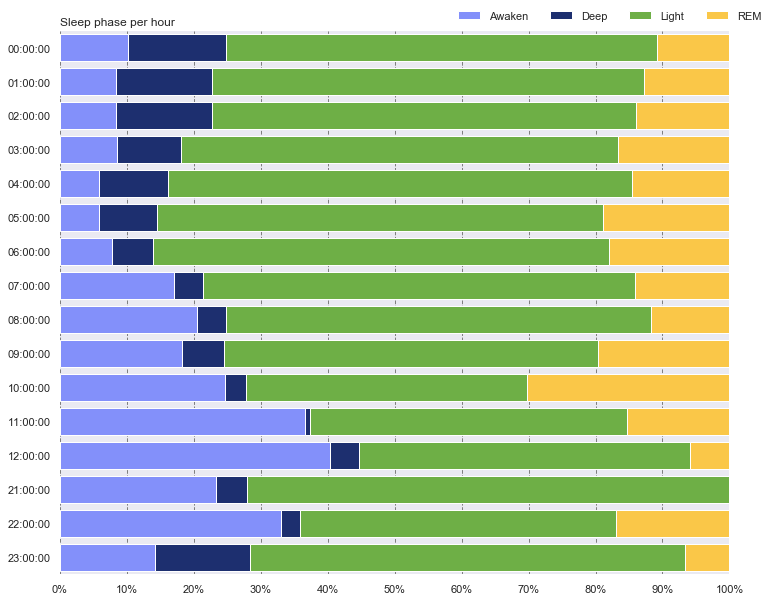

In [52]:
#https://towardsdatascience.com/stacked-bar-charts-with-pythons-matplotlib-f4020e4eb4a7

# variables
labels = ['Awaken', 'Deep', 'Light', 'REM']
colors = ['#8390FA','#1D2F6F', '#6EAF46', '#FAC748']
title = 'Sleep phase per hour'
subtitle = ''

def plot_stackedbar_p(df, labels, colors, title, subtitle):
    fields = df.columns.tolist()
    
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx])
        left = left + df[name]
# title and subtitle
    plt.title(title, loc='left')
    plt.text(0, ax.get_yticks()[-1] + 0.75, subtitle)
# legend
    plt.legend(labels, bbox_to_anchor=([0.58, 1, 0, 0]), ncol=4, frameon=False)
# remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
# format x ticks
    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)
# adjust limits and draw grid lines
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()
    
plot_stackedbar_p(sleep_data_per_hour_pivot.sort_values('start_time_hour',ascending=False), labels, colors, title, subtitle)

| Stage        | Signification           | Description |
| ------------- | :-------------| :------------- |
| 40001      | **Awaken stage of sleep.** | Eyes open. Responsive to external stimuli. |
| 40002      | **Light stage of sleep.** | Breathing slows down and heartbeat becomes regular. Typically lasts between 1 and 20 minutes after falling asleep. |
| 40003 | **Deep stage of sleep.** | Brain waves slow down and become larger. Typically starts 35 - 45 minutes after falling asleep. |
| 40004 | **REM (Rapid Eye Movement) stage of sleep.** | Brain waves similar to waking. Most vivid dreams happen in this stage. Body does not move. |

*https://developer.samsung.com/health/server/partner-only/api-reference/data-types/sleep-stage.html*

# Comparison vs. step count

In [53]:
sleep_data_final.head()

,Date,Awaken,Deep,Light,REM,Total,Weekend
0,2020-09-01,00:45:00,00:42:00,04:52:00,01:46:00,08:05:00,0
1,2020-09-02,00:55:00,00:47:00,05:28:00,00:57:00,08:07:00,0
2,2020-09-03,00:32:00,00:49:00,02:52:00,01:34:00,05:47:00,0
3,2020-09-04,00:27:00,01:04:00,04:40:00,02:40:00,08:51:00,0
4,2020-09-05,00:38:00,00:46:00,06:05:00,01:07:00,08:36:00,1


In [54]:
step_count_data = pd.read_excel('Step_count.xlsx')

In [55]:
sleep_data_final_step = pd.merge(sleep_data_final,step_count_data)

In [56]:
sleep_data_final_step.head()

,Date,Awaken,Deep,Light,REM,Total,Weekend,Step count
0,2020-09-01,00:45:00,00:42:00,04:52:00,01:46:00,08:05:00,0,129
1,2020-09-02,00:55:00,00:47:00,05:28:00,00:57:00,08:07:00,0,1762
2,2020-09-03,00:32:00,00:49:00,02:52:00,01:34:00,05:47:00,0,2681
3,2020-09-04,00:27:00,01:04:00,04:40:00,02:40:00,08:51:00,0,11185
4,2020-09-05,00:38:00,00:46:00,06:05:00,01:07:00,08:36:00,1,8562


In [57]:
sleep_data_final_step['Awaken']=sleep_data_final_step['Awaken'].astype('timedelta64[m]')
sleep_data_final_step['Deep']=sleep_data_final_step['Deep'].astype('timedelta64[m]')
sleep_data_final_step['Light']=sleep_data_final_step['Light'].astype('timedelta64[m]')
sleep_data_final_step['REM']=sleep_data_final_step['REM'].astype('timedelta64[m]')
sleep_data_final_step['Total']=sleep_data_final_step['Total'].astype('timedelta64[m]')

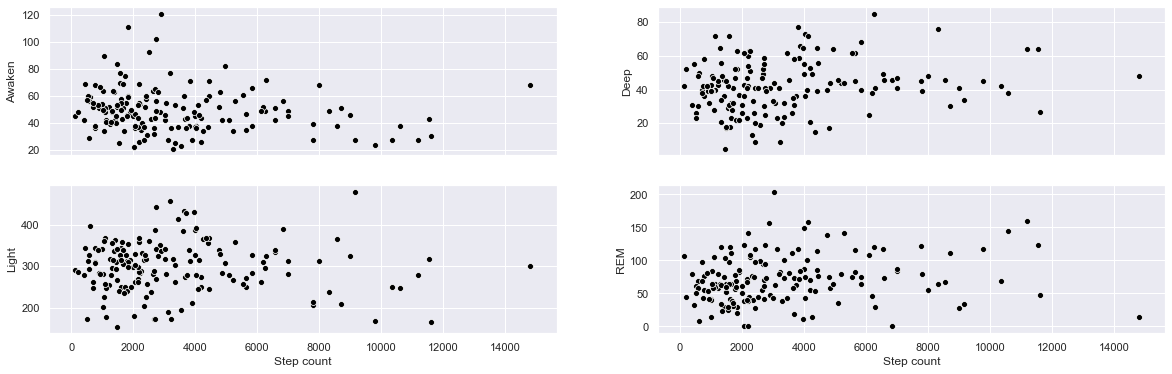

In [58]:
ig, axs = plt.subplots(nrows=2,ncols=2,sharex=True)
sns.scatterplot(x=sleep_data_final_step['Step count'],y=sleep_data_final_step['Awaken'],ax=axs[0,0],color='black')
sns.scatterplot(x=sleep_data_final_step['Step count'],y=sleep_data_final_step['Deep'],ax=axs[0,1],color='black')
sns.scatterplot(x=sleep_data_final_step['Step count'],y=sleep_data_final_step['Light'],ax=axs[1,0],color='black')
sns.scatterplot(x=sleep_data_final_step['Step count'],y=sleep_data_final_step['REM'],ax=axs[1,1],color='black')

In [59]:
sleep_data_final_step.corr()

,Awaken,Deep,Light,REM,Total,Weekend,Step count
Awaken,1.000000,0.019027,0.324924,-0.260756,0.369869,-0.106248,-0.174976
Deep,0.019027,1.000000,0.130947,0.049142,0.341489,0.079188,0.186280
Light,0.324924,0.130947,1.000000,-0.167425,0.847836,-0.074469,-0.042428
REM,-0.260756,0.049142,-0.167425,1.000000,0.297582,-0.005357,0.178943
Total,0.369869,0.341489,0.847836,0.297582,1.000000,-0.071833,0.050675
Weekend,-0.106248,0.079188,-0.074469,-0.005357,-0.071833,1.000000,0.271935
Step count,-0.174976,0.186280,-0.042428,0.178943,0.050675,0.271935,1.000000


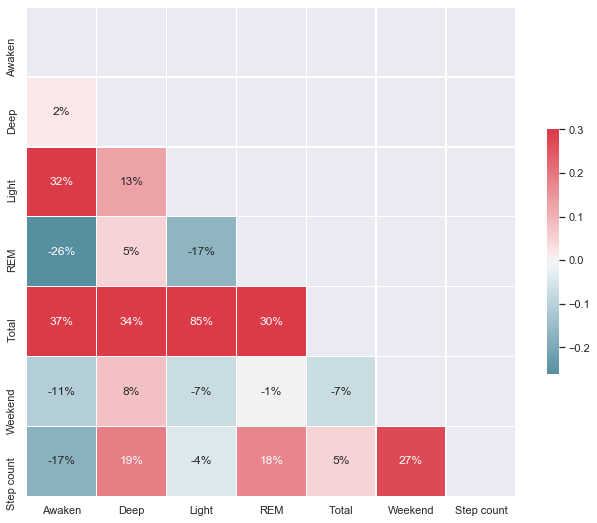

In [60]:
mask = np.zeros_like(sleep_data_final_step.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(sleep_data_final_step.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, fmt='0.0%')

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da
#https://github.com/mwaskom/seaborn/issues/1773

- 'Step count' is **19%** correlated with 'Deep'
- 'Step count' is **18%** correlated with 'REM'
- 'Step count' is **-17%** correlated with 'Awaken'

These might not be considered as very high correlation scores. Still, when it comes to finding correlations in human behaviours, it is worth noting.

We also have to keep in mind that correlation does not imply causation: these scores only tell us that changes in one variable are associated with changes in another variable.

# Comparison vs. GitHub activity

In [68]:
sleep_data_final.head()

,Date,Awaken,Deep,Light,REM,Total,Weekend
0,2020-09-01,00:45:00,00:42:00,04:52:00,01:46:00,08:05:00,0
1,2020-09-02,00:55:00,00:47:00,05:28:00,00:57:00,08:07:00,0
2,2020-09-03,00:32:00,00:49:00,02:52:00,01:34:00,05:47:00,0
3,2020-09-04,00:27:00,01:04:00,04:40:00,02:40:00,08:51:00,0
4,2020-09-05,00:38:00,00:46:00,06:05:00,01:07:00,08:36:00,1


In [70]:
github_data = pd.read_excel('Github_activity.xlsx')

In [71]:
sleep_data_final_github = pd.merge(sleep_data_final,github_data)

In [72]:
sleep_data_final_github.head()

,Date,Awaken,Deep,Light,REM,Total,Weekend,Github activity
0,2020-09-01,00:45:00,00:42:00,04:52:00,01:46:00,08:05:00,0,0
1,2020-09-02,00:55:00,00:47:00,05:28:00,00:57:00,08:07:00,0,0
2,2020-09-03,00:32:00,00:49:00,02:52:00,01:34:00,05:47:00,0,0
3,2020-09-04,00:27:00,01:04:00,04:40:00,02:40:00,08:51:00,0,0
4,2020-09-05,00:38:00,00:46:00,06:05:00,01:07:00,08:36:00,1,0


In [73]:
sleep_data_final_github['Awaken']=sleep_data_final_github['Awaken'].astype('timedelta64[m]')
sleep_data_final_github['Deep']=sleep_data_final_github['Deep'].astype('timedelta64[m]')
sleep_data_final_github['Light']=sleep_data_final_github['Light'].astype('timedelta64[m]')
sleep_data_final_github['REM']=sleep_data_final_github['REM'].astype('timedelta64[m]')
sleep_data_final_github['Total']=sleep_data_final_github['Total'].astype('timedelta64[m]')

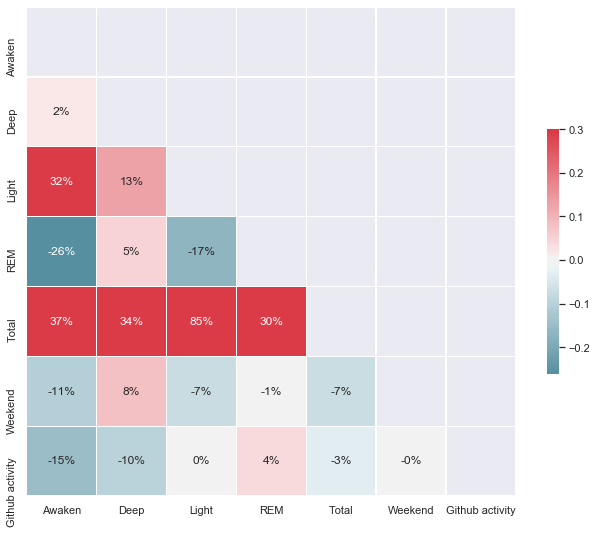

In [74]:
mask = np.zeros_like(sleep_data_final_github.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(sleep_data_final_github.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, fmt='0.0%')

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da
#https://github.com/mwaskom/seaborn/issues/1773

- 'Github activity' is **-15%** correlated with 'Awaken'
- 'Github activity' is **-10%** correlated with 'Deep'

These correlations could be explained by the fact that I have only categorized as "1" when I was coding late at night. I wanted to assess whether late coding would affect my sleep. As a matter of fact, I usually coded until I would feel sleepy, so I did not have troubles to sleep. This could explain the negative correlation with "Awaken". Besides, I was expecting a negative correlation with deep sleep knowing the fact that when you go to sleep later than you should, you might miss some sleeping phases. I have read that deep sleep usually occurs in the very first stages of sleep. Therefore, having a negative correlation with GitHub activity was expected.

These might not be considered as very high correlation scores. Still, when it comes to finding correlations in human behaviours, it is worth noting.